# Multivariate Linear Regression

## Sacpy.MultLinReg

### Math Euqation

$$
    y[idx] = slope[idx,0] * x[0] + slope[idx, 1] * x[1] + ... + intcp[idx]
$$

### parameter: 

* x (np.ndarray): shape = (time, N) ; N is Number of factors
* y (np.ndarray): shape = (time,*number)
* cal_sim (Bool) : Whether to call function multi_linreg
* x's dim0 must equal to y'dim0 !

### Attribute:
+ slope (np.ndarray): Slope, shape = [N,*number]
+ intcpt (np.ndarray) : intercept , shape = [*number]
+ R (np.ndarray) :
    multiple correlation coefficient , shape = [*number]
+ pv_all(np.ndarray) : F test p value , shape = [*number]
+ pv_i(np.ndarray) :
    F test p value of every infact, shape = [N, *number]
    

## Example

Get the influence of IOD and clean the influence of simultaneous ENSO 

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sacpy as scp
import matplotlib.pyplot as plt

### Get Nino3.4 Index and IOD Index

In [2]:
sst = scp.load_sst()['sst']
# get ssta
ssta = scp.get_anom(sst,method=1)
# calculate Nino3.4
Nino34 = ssta.loc[:,-5:5,190:240].mean(axis=(1,2))
# get IOD index
IODW = ssta.loc[:,-10:10,50:70].mean(axis=(1,2))
IODE = ssta.loc[:,-10:0,90:110].mean(axis=(1,2))
IODI = +IODW - IODE

X = np.vstack([Nino34,IODI]).T
# multiple linear regression
MLR = scp.MultLinReg(X,ssta)

### Plot the significance test and IOD index slope

<Figure size 640x480 with 0 Axes>

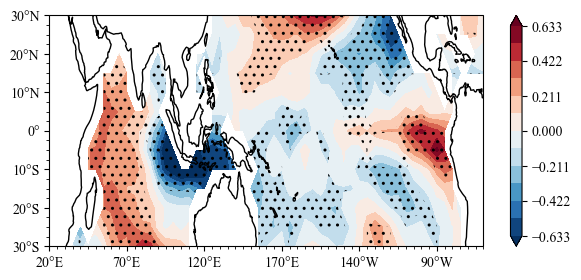

In [3]:
import sacpy.Map
import cartopy.crs as ccrs
fig = plt.figure(figsize=[7, 3])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lon ,lat = np.array(ssta.lon) , np.array(ssta.lat)
m = ax.scontourf(lon,lat,MLR.slope[1])
n = ax.sig_plot(lon,lat,MLR.pv_i[1],color="k",marker="..")
ax.init_map(stepx=50, smally=2.5)
plt.colorbar(m)